### 0. Import "three musketeers'" of the ML world!

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### 1. Load the data

In [4]:
df = pd.read_csv('heart.csv')

In [5]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


### 2. Explore the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


- all numerical
- no missing value
- no normalization
- label-based ordered! shuffling is needed
- 13 faetures & 303 rows
- binary classification

In [9]:
df.output.value_counts(normalize=True)

output
1    0.544554
0    0.455446
Name: proportion, dtype: float64

- balanced class distribution

In [10]:
target_column = 'output'

# all features
features = np.array(df.columns.difference([target_column]))

# categorical features
categorical_features = ['sex', 'cp', 'restecg', 'slp', 'caa', 'thall', 'fbs', 'exng']

# others
non_cat_features = [feature for feature in features if feature not in categorical_features]

print("All features -> ", features)
print("Non-categorical features -> ", non_cat_features)
print("Categorical features -> ", categorical_features)
print(f"All -> {len(features)} | Categorical -> {len(categorical_features)} | Others -> {len(non_cat_features)}")

All features ->  ['age' 'caa' 'chol' 'cp' 'exng' 'fbs' 'oldpeak' 'restecg' 'sex' 'slp'
 'thalachh' 'thall' 'trtbps']
Non-categorical features ->  ['age', 'chol', 'oldpeak', 'thalachh', 'trtbps']
Categorical features ->  ['sex', 'cp', 'restecg', 'slp', 'caa', 'thall', 'fbs', 'exng']
All -> 13 | Categorical -> 8 | Others -> 5


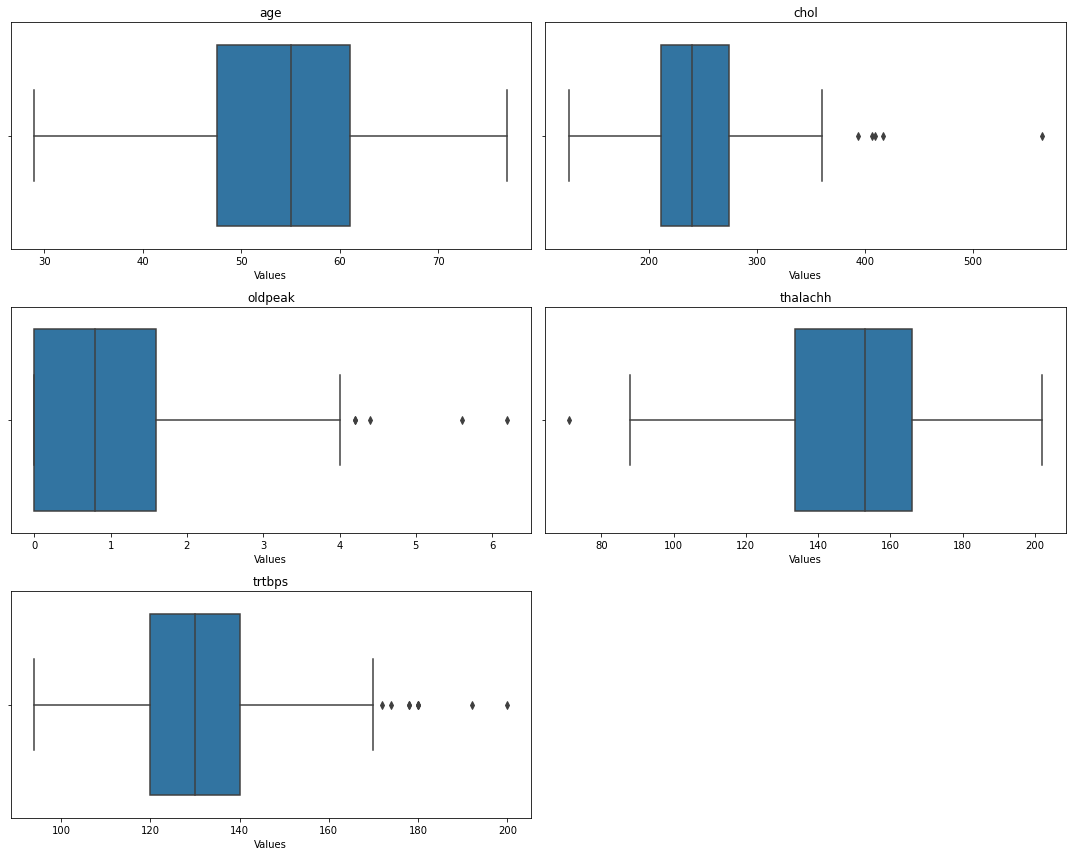

In [13]:
# we have 5 non_categorical features
num_rows = 3
num_cols = 2

plt.figure(figsize=(15, 12))

# Loop through each feature and create a subplot
for i, feature in enumerate(non_cat_features):  # If using a DataFrame
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(feature)
    plt.xlabel('Values')

plt.tight_layout()
plt.show()

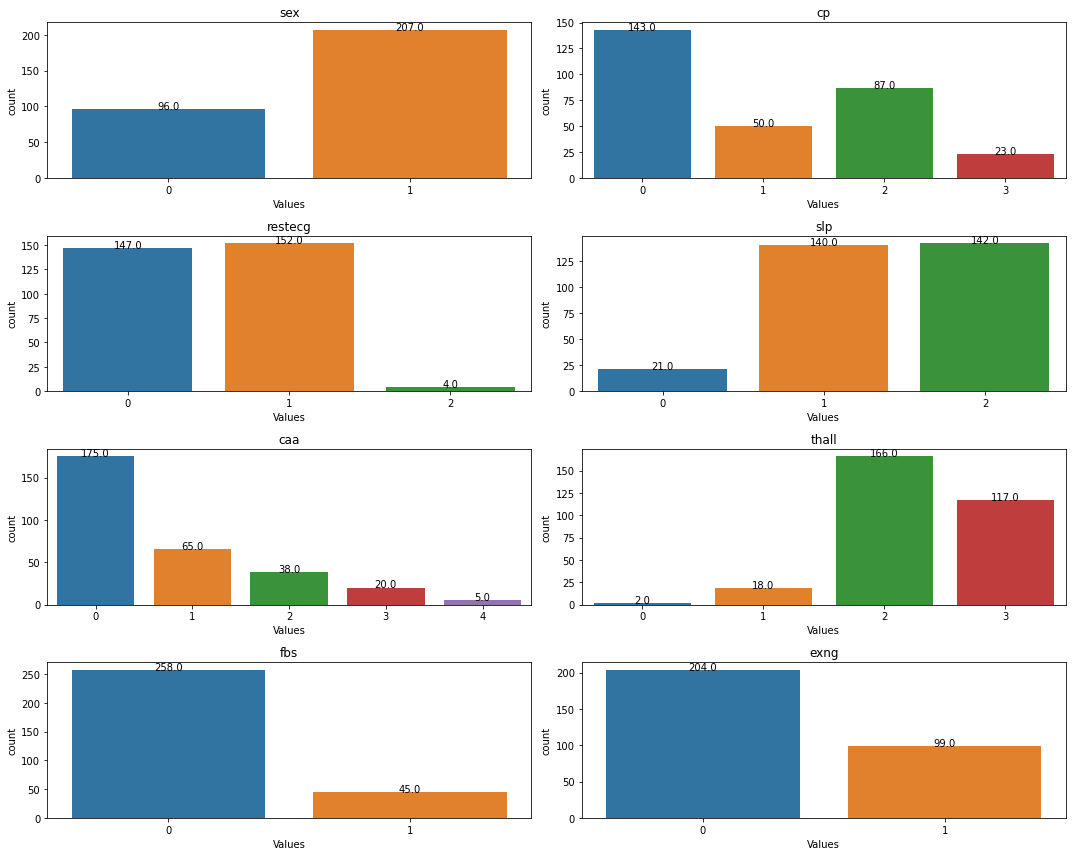

In [14]:
# we have 8 features
num_rows = 4
num_cols = 2

plt.figure(figsize=(15, 12))

# Loop through each feature and create a subplot
for i, feature in enumerate(categorical_features):  # If using a DataFrame
    plt.subplot(num_rows, num_cols, i + 1)
    ax = sns.countplot(x=df[feature])
    plt.title(feature)
    plt.xlabel('Values')
    
    # Add exact values to the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.tight_layout()
plt.show()

There are potential outliers, e.g. chol > 400, but for the moment I will not touch them.

### 3. Split the data

In [15]:
X = df.drop('output', axis=1)
y = df['output']

In [16]:
X.shape

(303, 13)

In [17]:
y.shape

(303,)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)

### 4. Scale the data

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

In [22]:
X_train_scaled = scaler.fit_transform(X_train)

In [23]:
X_test_scaled = scaler.transform(X_test)

In [24]:
print("X_train -> ", X_train.shape)
print("X_test -> ", X_test.shape)
print("Y_train -> ", y_train.shape)
print("X_train -> ", y_test.shape)

X_train ->  (227, 13)
X_test ->  (76, 13)
Y_train ->  (227,)
X_train ->  (76,)


### 5. Build Support Vector Machine Classifier

In [25]:
from sklearn.svm import SVC

In [26]:
model = SVC()
model.fit(X_train_scaled, y_train)

SVC()

### 6. Evaluate the model

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [30]:
y_pred = model.predict(X_test_scaled)
confusion_matrix(y_test, y_pred)

array([[23, 12],
       [ 6, 35]])

In [31]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print("Accuracy:", round(accuracy,4))
print("Recall:", round(recall, 4))
print("Precision:", round(precision,4))

Accuracy: 0.7632
Recall: 0.8537
Precision: 0.7447


In [32]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.66      0.72        35
           1       0.74      0.85      0.80        41

    accuracy                           0.76        76
   macro avg       0.77      0.76      0.76        76
weighted avg       0.77      0.76      0.76        76



### 7. Hyper-parameter Optimization 1 - Random Search

In [35]:
from sklearn.model_selection import RandomizedSearchCV

In [36]:
from scipy.stats import uniform, randint

In [37]:
param_grid = {
    'C': uniform(0.1, 10),           # Penalty parameter C (uniform distribution between 0.1 and 10)
    'kernel': ['linear', 'rbf'],     # Kernel type (linear or radial basis function)
    'gamma': uniform(0.01, 1.0),     # Kernel coefficient for rbf kernel (uniform distribution between 0.01 and 1.0)
}

In [38]:
svm_model = SVC()

In [39]:
random_search = RandomizedSearchCV(svm_model, param_distributions=param_grid, n_iter=20, cv=5, random_state=42)

In [40]:
random_search.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fcd88b9aa30>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fcd88ba4fa0>,
                                        'kernel': ['linear', 'rbf']},
                   random_state=42)

In [41]:
print("Best Hyperparameters:", random_search.best_params_)
print("Best Mean Cross-validated Score:", random_search.best_score_)

Best Hyperparameters: {'C': 0.17066305219717406, 'gamma': 0.03306242504141576, 'kernel': 'linear'}
Best Mean Cross-validated Score: 0.85487922705314


In [42]:
best_model = random_search.best_estimator_

In [43]:
y_pred = best_model.predict(X_test_scaled)

In [44]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print("Accuracy:", round(accuracy,4))
print("Recall:", round(recall, 4))
print("Precision:", round(precision,4))

Accuracy: 0.7763
Recall: 0.9024
Precision: 0.74


### 8. Hyper-parameter Optimization 2 - Bayesian

In [48]:
# !pip install scikit-optimize

In [49]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

In [50]:
param_space = {
    'C': Real(1e-6, 1e+6, prior='log-uniform'),  # Penalty parameter C (log-uniform distribution between 1e-6 and 1e+6)
    'kernel': Categorical(['linear', 'rbf']),    # Kernel type (linear or radial basis function)
    'gamma': Real(1e-6, 1e+1, prior='log-uniform') if 'rbf' in ['linear', 'rbf'] else None  # Gamma for rbf kernel
}

In [51]:
svm_model = SVC()

In [52]:
bayes_search = BayesSearchCV(svm_model, param_space, n_iter=20, cv=5, random_state=42)

In [ ]:
bayes_search.fit(X_train_scaled, y_train)

In [ ]:
print("Best Hyperparameters:", bayes_search.best_params_)
print("Best Mean Cross-validated Score:", bayes_search.best_score_)

In [ ]:
y_pred = best_model.predict(X_test_scaled)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print("Accuracy:", round(accuracy,4))
print("Recall:", round(recall, 4))
print("Precision:", round(precision,4))